<a href="https://colab.research.google.com/github/jananilakshminarayanan/DA-DS-projects/blob/main/jananiL_evergreenloanapprovalpred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement : Evergreen Loans, a home loan vendor wants to build a ML model which can predict the loan eligibility for new applicants based on their financial information.

**Solution Approach:**  Since the target/output variable Loan_Status is clearly a categorical variable classification model i.e logistic regression is applied on the dataset.Feature Selection done using Pearson’s Correlation Coefficient: f_regression(). Inorder to aid feature selection methods all categorical data has been transformed to numeric data.	Tried out numerous classification models such as logistic regression, Decision tree classifier and random forest to test the model performance in accuracy and confusion matrix. Since the Logistic regression model gave the maximum performance metric of accuracy chose the model and predicted Loan_status using the said model . Stored the Loan_ID and Loan_status in a separate csv file called final_submission.


1.) Data Preprossesing and Feature Engineering:

In [ ]:
# import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# load train and test datasets
train = pd.read_csv("train_file.csv")
test = pd.read_csv("test_file.csv")

In [ ]:
# Show first 10 rows in train dataset
train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [ ]:
# Show first 10 rows in test dataset
test.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [ ]:
# explore the dataset
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
# find out datatypes of columns
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
# check for NaN values
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# using statistical imputation methods replace Nan values

train['Gender'].fillna(train['Gender'].mode()[0], inplace = True)
train['Married'].fillna(train['Married'].mode()[0], inplace = True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace = True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace = True)
train['LoanAmount'].fillna(train['LoanAmount'].mean(),inplace = True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace = True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace = True)



In [ ]:
# check for NaN values
train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Categorical datatypes are converted to numerical datatypes using label encoder. Label Encoding converts each unique value in a column to a number.

In [ ]:
# using labelencoder all categorical columns converted to numerical i.e int datatypes
from sklearn.preprocessing import LabelEncoder

lb_enc = LabelEncoder()
train['Loan_ID'] = lb_enc.fit_transform(train['Loan_ID'])
train['Gender'] = lb_enc.fit_transform(train['Gender'])
train['Married'] = lb_enc.fit_transform(train['Married'])
train['Dependents'] = lb_enc.fit_transform(train['Dependents'])
train['Education'] = lb_enc.fit_transform(train['Education'])
train['Self_Employed'] = lb_enc.fit_transform(train['Self_Employed'])
train['Property_Area'] = lb_enc.fit_transform(train['Property_Area'])
train['Loan_Status'] = lb_enc.fit_transform(train['Loan_Status'])


In [ ]:
# find out datatypes of columns
train.dtypes

Loan_ID                int64
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

feature selection using Pearson’s Correlation Coefficient: f_regression().
Here we will first plot the Pearson correlation heatmap and see the correlation of independent variables(features) with the output variable(target) Loan_Status. The correlation coefficient has values between -1 to 1.A value closer to 0 implies weaker correlation (exact 0 implying no correlation). A value closer to 1 implies stronger positive correlation. A value closer to -1 implies stronger negative correlation. We will only select features which has quantifiable correlation  values with the output variable.


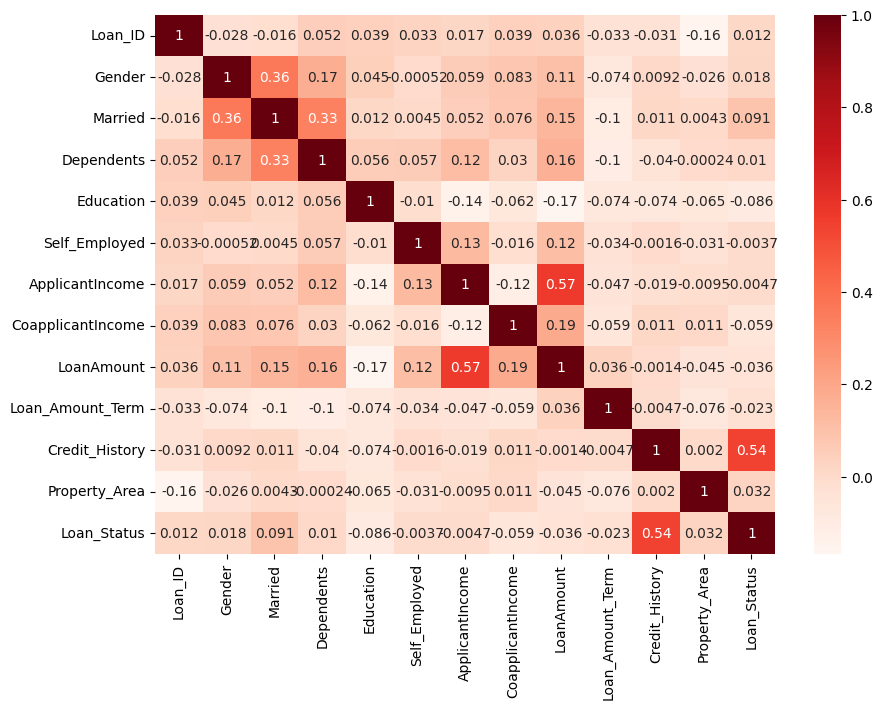

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(10,7))
cor = train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


from the above heatmap it can clearly be seen that only the features credit history, married & property area have atleast milder levels of influence over traget variable. Hence we will sellect these two as features first and build our logistic regression model

In [ ]:
# build features and target dataset
X = train[['Credit_History','Married','Property_Area']]
y = train['Loan_Status']

In [ ]:
# using standard scaler normalize or standardoze the input/feature values for better regression results
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1 = scaler.fit_transform(X)

In [ ]:
# split dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X1,y,test_size=0.2)

In [ ]:
# build logistic regression model on train set
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# predict values using test set
y_pred = reg.predict(X_test)

In [ ]:
# analyze performance using confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
print("Confusion Matrix: \n", confusion_matrix(y_test,y_pred))
print("Accuracy score: ", accuracy_score(y_test,y_pred))

Confusion Matrix: 
 [[16 27]
 [ 2 78]]
Accuracy score:  0.7642276422764228


Using ML model built to predict values from test file

In [ ]:
#check datatypes of test dataframe
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [ ]:
# check for Nan values
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [ ]:
# use statistical imputation methods to replace nan
test['LoanAmount'].fillna(test['LoanAmount'].mean(), inplace = True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace = True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace = True)


In [ ]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

In [ ]:
# convert categorical columns to numerical using labelencoder
from sklearn.preprocessing import LabelEncoder

lb_enc = LabelEncoder()
test['Loan_ID'] = lb_enc.fit_transform(test['Loan_ID'])
test['Gender'] = lb_enc.fit_transform(test['Gender'])
test['Married'] = lb_enc.fit_transform(test['Married'])
test['Dependents'] = lb_enc.fit_transform(test['Dependents'])
test['Education'] = lb_enc.fit_transform(test['Education'])
test['Self_Employed'] = lb_enc.fit_transform(test['Self_Employed'])
test['Property_Area'] = lb_enc.fit_transform(test['Property_Area'])


In [ ]:
test.dtypes

Loan_ID                int64
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
dtype: object

In [ ]:
# load test features
x_test = test[['Credit_History','Married','Property_Area']]

In [ ]:
# using standard scaler normalize or standardoze the input/feature values for better regression results
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xt = scaler.fit_transform(x_test)

In [ ]:
# predict values on test set
y_pred = reg.predict(Xt)

In [ ]:
# assign predictions to a new column called cltv in test dataset
test['Loan_Status'] = y_pred.astype('int')

In [ ]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2,1
1,1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2,1
2,2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2,1
3,3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2,1
4,4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2,1


In [ ]:
#creating the final submission file
final_submission = test[['Loan_ID','Loan_Status']]
final_submission.to_csv("final_submission1.csv",index=False)